Exploring Different Classification Methods

By: Ryan

Main Idea:

    The aim of this project is to explore various classification methods, train/test them using the Diabetes Dataset that is open source on the UCI Machine Learning Repository, and determine which classification method is the most effective in classifying/predicting unseen data in order to determine if a patient with a set of given attributes has diabetes or not. 

Data Cleaning/Preperation:

    This dataset is as clean as they come for the most part. There are only 500 or so instances of patients and every column is spelled correctly, there are no missing values, no blank rows or NA values. The only thing that needs to be done is to convert the yes/no answers that the patients gave in response to each question into 1/0 format so that the algorithms in the sklearn library can read them. This process is done simply below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics 

Data = pd.read_csv('/Users/RyanReiff/Documents/Machine_Learning_Datasets/Diabetes_Classification.csv', header=None)

Column_Header = Data.iloc[0] 
Data = Data[1:] 
Data.columns = Column_Header

Data = Data.replace('Male',1)
Data = Data.replace('Female',0)
Data = Data.replace('Yes',1)
Data = Data.replace('No',0)
Data = Data.replace('Positive',1)
Data = Data.replace('Negative',0)

Data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
1,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
2,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
4,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
5,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
517,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
518,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
519,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


Now construct a Correlation Matrix in order to observe the relationship between various variables.

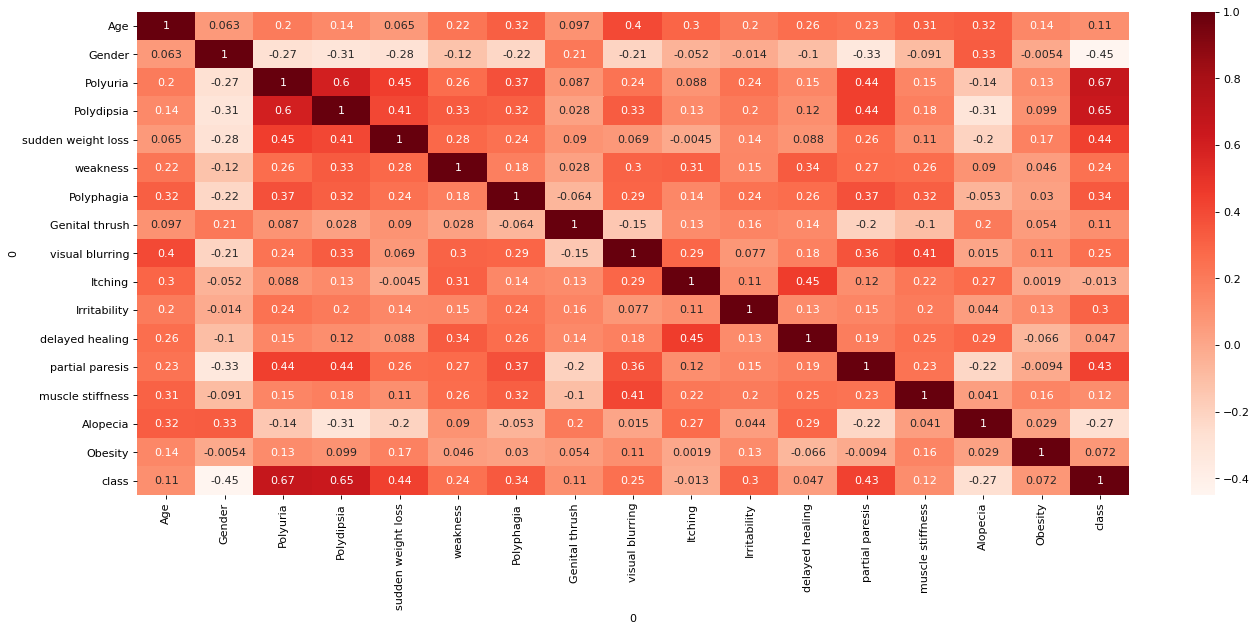

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

Data = Data.astype(float)
corr = Data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

Analysis:
    
    The correlation matrix shows that there is very little correlation between our variables for the most part, which is a good thing because each variable (and the answer to its question) should provide new insight into whether or not the patient has diabetes. If there are strongly correlated variables then they basically ask the same question twice which does not help the machine learning algorithm learn.
    
    We can also see that Polyuria and Polydipsia have the strongest impact on classifying our patients as diabetic or not, which is worth noting.

The Setup:

    Below I will use 3 seperate machine learning classification algorithms in order to predict if an unseen sample of patients can accurately be diagnosed as diabetic or not. To do this I will split the data into a Training/Validation Set as well as a Final Test Set. This way I will have data to train and validate with, as well as data that the model has never seen before to do final tests on to determine accuracy.
    
    The layout will go as follows-
    
    1) Decision Tree
    2) K-Nearest Neighbor
    3) Random Forest

In [3]:
Test_Dataset = Data.sample(frac=0.1, random_state=13)
Training_Validation_Dataset = Data.drop(Test_Dataset.index)

Data = Training_Validation_Dataset
Data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
2,58.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,41.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,45.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,55.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,39.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
517,48.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
518,58.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
519,32.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


DECISION TREE CLASSIFICATION

Main Idea:

    The first method that I will be testing is the Decision Tree Classifier. This method will only need to have a single Hyperparameter tuned, this being "Alpha", since I will be using Cost Complexity Pruing (CCP). In order to find Alpha I will construct a learning curve using repeated K-fold cross validation, and determine at which level of Alpha I see a drop off in both the training and testing data. This will occur at some yet to be specified Alpha. Since Alpha increases as one moves along the X-Axis, it will eventually reduce the accuracy of both the training as well as the testing sets as more and more terminal nodes of the tree are removed.

Now Compute Optimal Alpha Using Cross Validation

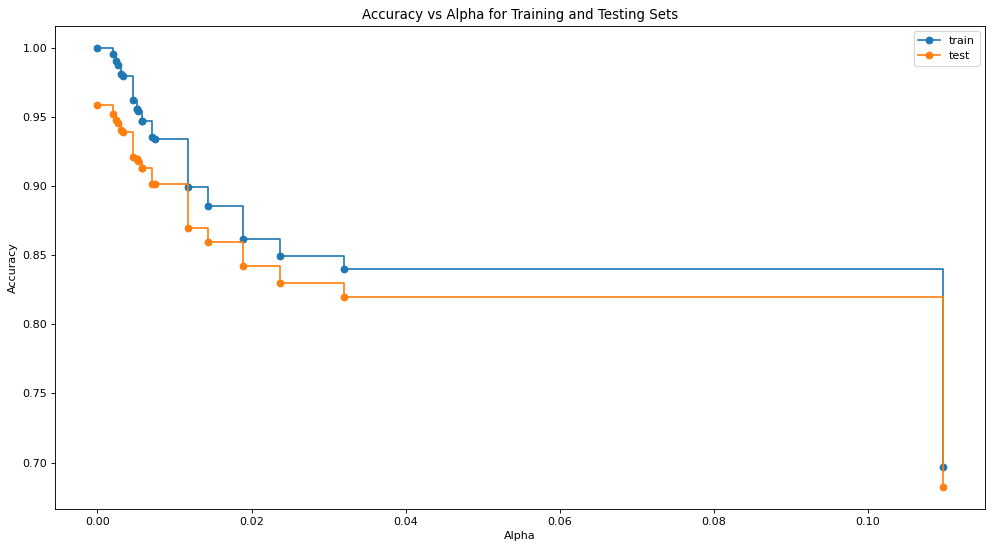

In [4]:
from sklearn.model_selection import RepeatedKFold

X = Data[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y = Data[['class']]
y = y.values.ravel()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             random_state=13, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight=None, ccp_alpha=0.0)


path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


parameter_range = ccp_alphas
  
cv = RepeatedKFold(n_splits=4, n_repeats=10, random_state=13)

train_score, test_score = validation_curve(DecisionTreeClassifier(criterion='gini', 
                            splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             random_state=13, max_leaf_nodes=None, min_impurity_decrease=0.000, 
                             min_impurity_split=None, class_weight=None, ccp_alpha=0.0), X, y, 
                             param_name = "ccp_alpha", 
                             param_range = parameter_range, 
                             cv = cv, scoring = "accuracy") 
  
mean_train_score = np.mean(train_score, axis = 1) 
mean_test_score = np.mean(test_score, axis = 1) 
  
    
fig, ax = plt.subplots(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing Sets")
ax.plot(parameter_range, mean_train_score, marker='o', label="train", drawstyle="steps-post")
ax.plot(parameter_range, mean_test_score, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Conclusion:

    Here we can see that pruning our tree actually degrades the performance of our Decision Tree. Therefore, we will keep alpha at zero, since our model does not overfit despite our lack of pruning. This is an uncommon occurance, as usually we will see some degree of pruning raise the performance of the test dataset, while decreasing the performance of the training set.

Final Accuracy Test on Unseen Data

In [5]:
X_Test_Dataset = Test_Dataset[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y_Test_Dataset = Test_Dataset[['class']]


clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             random_state=13, max_leaf_nodes=None, min_impurity_decrease=0.000, 
                             min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

clf.fit(X,y)

y_pred = clf.predict(X_Test_Dataset)

print("Accuracy When Comparing Predictions to Unseen Test Data:",metrics.accuracy_score(y_Test_Dataset, y_pred))



Accuracy When Comparing Predictions to Unseen Test Data: 0.9230769230769231


Visualization of Part of the Decision Tree

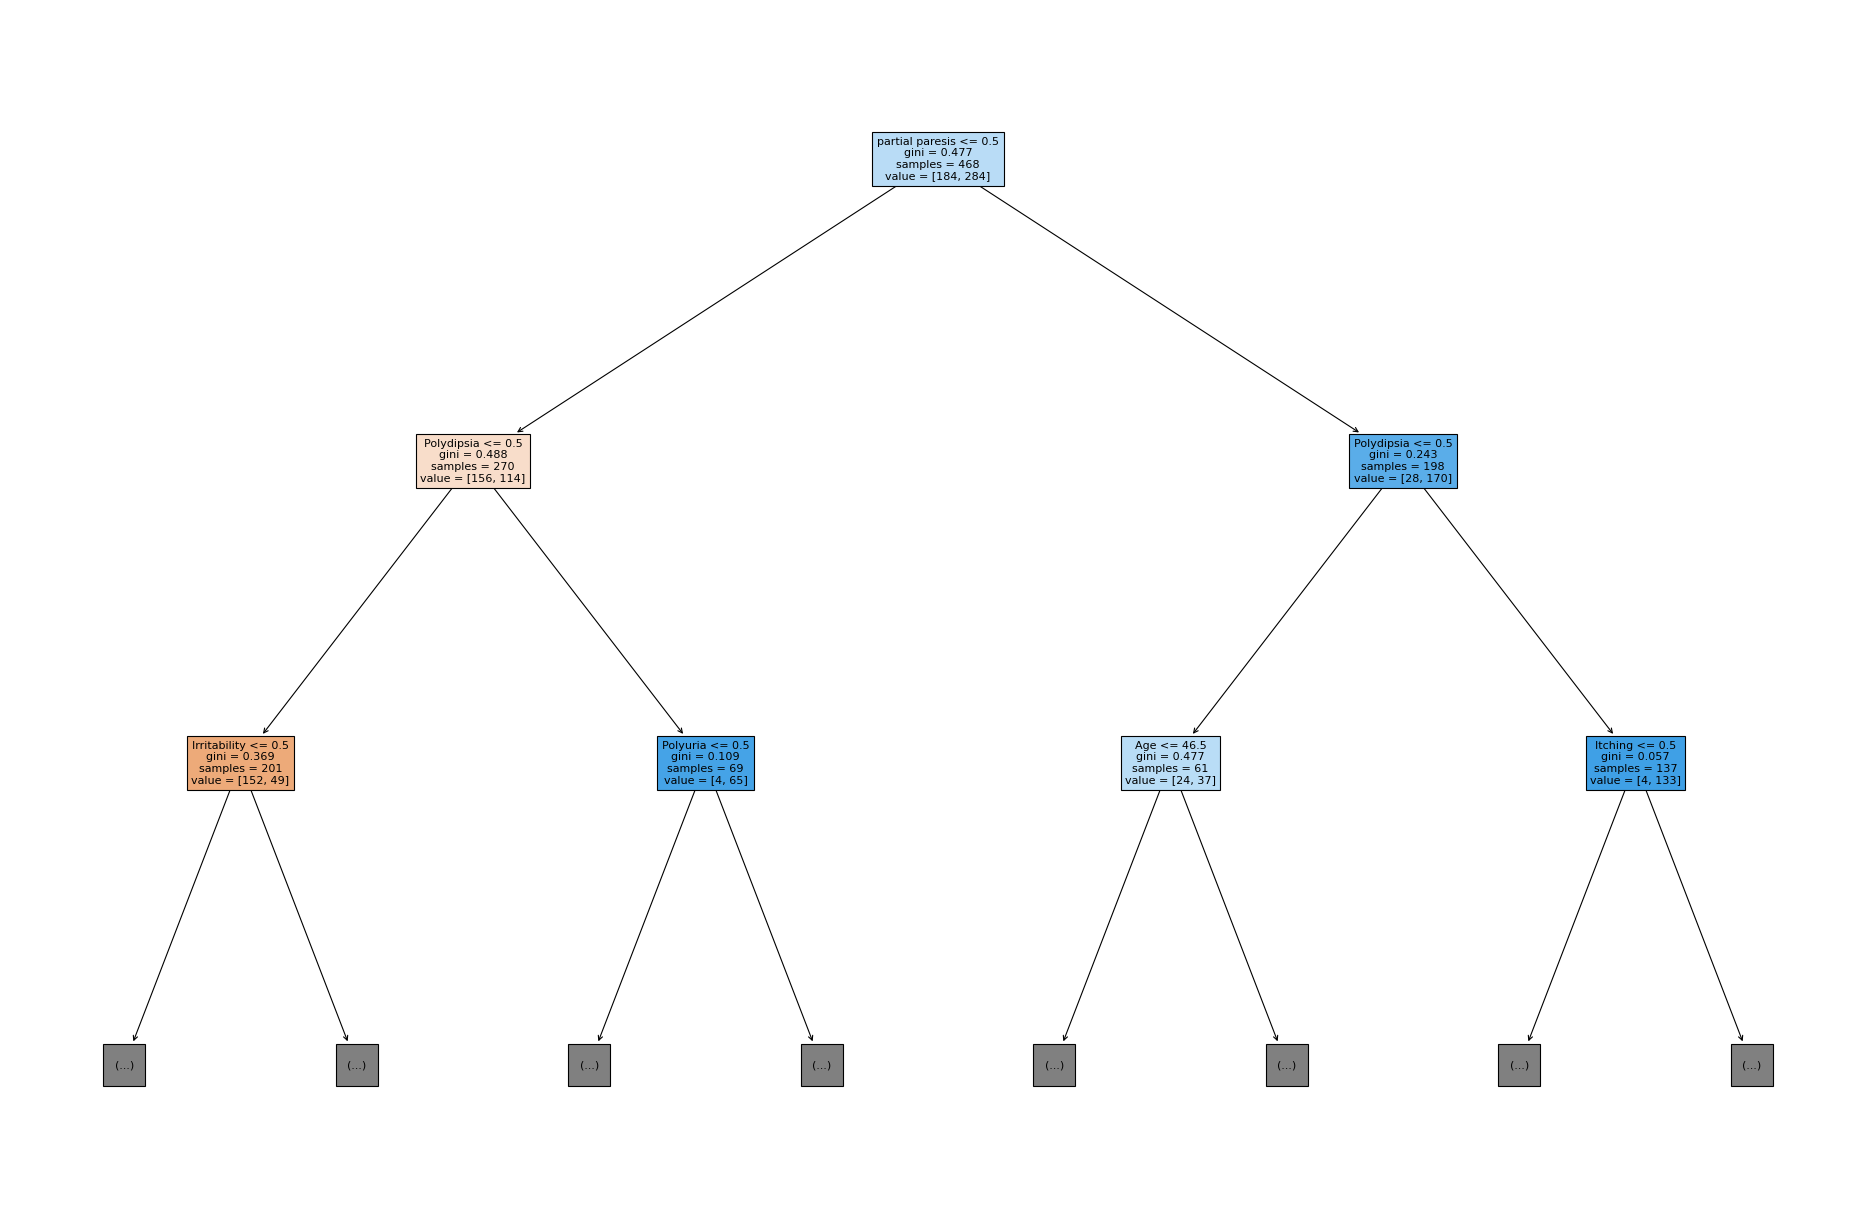

In [6]:
from sklearn import tree
fig = plt.figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
_ = tree.plot_tree(clf,feature_names=X.columns,filled=True,fontsize=10,max_depth=2)

K NEAREST NEIGHBOR CLASSIFICATION

Main Idea:
    
    The main steps of this element of the project is testing the accuracy of the K-Nearest Neighbor Algorithm. This is the simplest classficatoin algorithm that exists, but that does not mean that it can't be effective. The hyperparameters in question here will be the number of neighbors to be used, as well as the leaf size and type of weighted distance. Grid Search Cross Validation will be used to optimize this, since there is more than one hyperparameter and since the algorithm (KNN) runs quickly, making the slow Grid Search CV Method more tolerable.

In [7]:
Data = pd.read_csv('/Users/RyanReiff/Documents/Machine_Learning_Datasets/Diabetes_Classification.csv', header=None)

Column_Header = Data.iloc[0] 
Data = Data[1:] 
Data.columns = Column_Header

Data = Data.replace('Male',1)
Data = Data.replace('Female',0)
Data = Data.replace('Yes',1)
Data = Data.replace('No',0)
Data = Data.replace('Positive',1)
Data = Data.replace('Negative',0)


Test_Dataset = Data.sample(frac=0.1, random_state=13)
Training_Validation_Dataset = Data.drop(Test_Dataset.index)

Data = Training_Validation_Dataset
Data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
2,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
4,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
5,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
6,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
517,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
518,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
519,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


X = Data[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y = Data[['class']]
y = y.values.ravel()

X_Test_Dataset = Test_Dataset[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y_Test_Dataset = Test_Dataset[['class']]


cv = RepeatedKFold(n_splits=4, n_repeats=7, random_state=13)


param_grid = {'leaf_size': np.arange(10,50),
              'n_neighbors': np.arange(1,20),
              'weights': ['uniform','distance']}

grid = GridSearchCV(KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree', 
                       leaf_size=30, p=2, metric='minkowski', metric_params=None, 
                       n_jobs=None), param_grid, cv=cv, error_score = 'raise')

grid.fit(X, y)

#y_pred = grid.predict(X_Test_Dataset)
#print("Accuracy When Comparing Predictions to Unseen Test Data:",metrics.accuracy_score(y_Test_Dataset, y_pred))


GridSearchCV(cv=RepeatedKFold(n_repeats=7, n_splits=4, random_state=13),
             error_score='raise',
             estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [9]:
print("The best parameters to use are", grid.best_params_, '\n')
print("The cross validated score of the best estimators is", grid.best_score_)
#grid.cv_results_

The best parameters to use are {'leaf_size': 11, 'n_neighbors': 1, 'weights': 'uniform'} 

The cross validated score of the best estimators is 0.9307081807081807


Conclusion:
    
    Here we can see the optimal number of leaves is 11 on our kd_tree and the optimal number of neighbors is just 1 and that we should be using uniform weight. With these variables optimized we can train our dataset accordingly and see how well it will perform on unseen data.

Final Accuracy Test on Unseen Data

In [10]:
X_Test_Dataset = Test_Dataset[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y_Test_Dataset = Test_Dataset[['class']]


clf = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='ball_tree', 
                       leaf_size=11, p=2, metric='minkowski', metric_params=None, 
                       n_jobs=None)
    
clf.fit(X,y)

y_pred = clf.predict(X_Test_Dataset)

print("Accuracy with unseen test data is", (metrics.accuracy_score(y_Test_Dataset, y_pred)), '\n')


Accuracy with unseen test data is 0.9038461538461539 



RANDOM FOREST CLASSIFICATION

Main Idea:
    
    Here we will use a semi-homemade version of Bayesian Optimization Cross Validation in order to optimize two seperate hyperparameters in the Random Forest Model. We use this instead of Grid Search CV because with Bayesian Optimization CV the process will be much faster, which is important since the Random Forest Model is slow enough on its own.

In [11]:
Data = pd.read_csv('/Users/RyanReiff/Documents/Machine_Learning_Datasets/Diabetes_Classification.csv', header=None)

Column_Header = Data.iloc[0] 
Data = Data[1:] 
Data.columns = Column_Header

Data = Data.replace('Male',1)
Data = Data.replace('Female',0)
Data = Data.replace('Yes',1)
Data = Data.replace('No',0)
Data = Data.replace('Positive',1)
Data = Data.replace('Negative',0)


Test_Dataset = Data.sample(frac=0.1, random_state=13)
Training_Validation_Dataset = Data.drop(Test_Dataset.index)

Data = Training_Validation_Dataset
Data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
2,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
4,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
5,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
6,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
517,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
518,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
519,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


GRID SEARCH CROSS VALIDATION

In [12]:
import time

start_time = time.time()

X = Data[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y = Data[['class']]
y = y.values.ravel()

X_Test_Dataset = Test_Dataset[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y_Test_Dataset = Test_Dataset[['class']]


cv = RepeatedKFold(n_splits=4, n_repeats=5, random_state=13)


param_grid = {'n_estimators': np.arange(100,550,50),
              'max_features': np.arange(2,10)}

grid = GridSearchCV(RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
        max_leaf_nodes=None, min_impurity_decrease=0.0, 
        bootstrap=True, oob_score=True, n_jobs=None, random_state=13, verbose=0, 
        warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None), param_grid, cv=cv, error_score = 'raise')

grid.fit(X, y)

print("--- %s seconds to run CV GridSearch Optimization ---" % (time.time() - start_time))

#y_pred = grid.predict(X_Test_Dataset)
#print("Accuracy When Comparing Predictions to Unseen Test Data:",metrics.accuracy_score(y_Test_Dataset, y_pred))



--- 1042.2115879058838 seconds to run CV GridSearch Optimization ---


In [13]:
print("The best parameters to use are", grid.best_params_, '\n')
print("The cross validated score of the best estimators is", grid.best_score_)

The best parameters to use are {'max_features': 2, 'n_estimators': 300} 

The cross validated score of the best estimators is 0.982905982905983


Final Accuracy Test on Unseen Data

In [14]:
X_Test_Dataset = Test_Dataset[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y_Test_Dataset = Test_Dataset[['class']]


clf = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, min_samples_split=2, 
        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=2, 
        max_leaf_nodes=None, min_impurity_decrease=0.0, 
        bootstrap=True, oob_score=True, n_jobs=None, random_state=13, verbose=0, 
        warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    
clf.fit(X,y)

y_pred = clf.predict(X_Test_Dataset)

print("Accuracy with unseen test data is", (metrics.accuracy_score(y_Test_Dataset, y_pred)), '\n')
print("Accuracy with Out of Bag data is", (clf.oob_score_))



Accuracy with unseen test data is 0.9807692307692307 

Accuracy with Out of Bag data is 0.9871794871794872


Conclusion:
    
    Above I listed both the out of bag accuracy as well as the testing accuracy, and they are comparable which makes sense. The model selected max_features to be 2, which is far smaller than the sqrt(n) standard implementation that is usually performed, which is why it is worth optimizing to discover this. The model also selected 300 trees, which makes sense as well since usually the more trees the better the accuracy.

A NEW METHOD: (GRID SEARCH BAYESIAN OPTIMIZATION)

    Grid Search Cross Validation's largest drawback is the time that it takes to run. As seen above, the need to check every point in the grid dramatically slows down run time. I propose a fix to this by using Cross Validation in combination with Bayesian Optimization, so that the hyperparameters can be computed as efficiently as possible. Bayesian Optimization can be used to find the maximums of various functions that arise from our Repeated K-Fold Cross Validation, store which hyperparameters were used to get to this maximum, and then by looking at these we can determine how to optimize our model.

In [15]:
import time
from bayes_opt import BayesianOptimization

X = Data[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y = Data[['class']]


df = pd.DataFrame(data=Data)

kf = RepeatedKFold(n_splits=4, n_repeats = 5, random_state=13)

Hold_Train = []
Hold_Test = []

for train_index, test_index in kf.split(df):
    Hold_Train.append(list(train_index))
    Hold_Test.append(list(test_index))


Store_Score = []
Store_trees = []
Store_features = []

start_time = time.time()

for i in range(0,len(Hold_Train)):
    X_train = X.iloc[list(Hold_Train[i])]
    y_train = y.iloc[list(Hold_Train[i])]
    X_test = X.iloc[list(Hold_Test[i])]
    y_test = y.iloc[list(Hold_Test[i])]


    def Optimize(trees, features):
        
        clf = RandomForestClassifier(n_estimators=int(trees), criterion='gini', max_depth=None, min_samples_split=2, 
                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=int(features), 
                    max_leaf_nodes=None, min_impurity_decrease=0.0, 
                    bootstrap=True, oob_score=True, n_jobs=None, random_state=13, verbose=0, 
                    warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
        
        clf.fit(X_train,y_train.values.ravel())
            
        y_pred = clf.predict(X_test)
        return (metrics.accuracy_score(y_test, y_pred))
    
    optimizer = BayesianOptimization(f=Optimize,pbounds={'trees': (100, 550),'features': (2, 10)},random_state=55)
    
    optimizer.maximize(init_points=5,n_iter=10)

    Store_trees.append(optimizer.max['params']['trees'])
    Store_features.append(optimizer.max['params']['features'])
    Store_Score.append(optimizer.max['target'])

print("--- %s seconds to run CV Bayesian Optimization ---" % (time.time() - start_time))

|   iter    |  target   | features  |   trees   |
-------------------------------------------------
|  1        |  0.9829   |  2.745    |  537.2    |
|  2        |  0.9829   |  5.871    |  209.1    |
|  3        |  0.9829   |  6.249    |  228.5    |
|  4        |  0.9829   |  8.901    |  118.5    |
|  5        |  0.9829   |  2.867    |  445.2    |
|  6        |  0.9829   |  9.94     |  549.8    |
|  7        |  0.9915   |  2.062    |  100.4    |
|  8        |  0.9915   |  2.014    |  100.5    |
|  9        |  0.9915   |  2.142    |  100.1    |
|  10       |  0.9915   |  2.128    |  101.0    |
|  11       |  0.9915   |  2.044    |  100.5    |
|  12       |  0.9915   |  2.037    |  101.7    |
|  13       |  0.9915   |  2.041    |  101.3    |
|  14       |  0.9915   |  2.04     |  101.4    |
|  15       |  0.9915   |  2.007    |  100.7    |
|   iter    |  target   | features  |   trees   |
-------------------------------------------------
|  1        |  0.9744   |  2.745    |  537.2    |


In [16]:
print("Optimal Number of Trees", int(np.mean(np.array(Store_trees).astype(int))))
print("Optimal Number for Max_Features", int(np.mean(np.array(Store_features).astype(int))))

Optimal Number of Trees 416
Optimal Number for Max_Features 2


Brief Analysis of these Results:
    
    Our optimal outcomes were roughly 400 'Trees' and 2 for 'Max_Features'. The algorithm was able to accomplish this in about 300 second which is far faster than the 900 to 1000 seconds that was required to achieve roughly the same result using Grid Search method. We could have even speeded up this process some more by choosing fewer initial starting points to explore on the function, or fewer iterations to hone in on the maximum. However, this method is far superiour to Grid Searching, and with a bit of creativity, it can be used in conjunction with Repeated K-fold Cross Validation as well as shown above.

Final Accuracy Test on Unseen Data

In [17]:
X = Data[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y = Data[['class']]
y = y.values.ravel()

X_Test_Dataset = Test_Dataset[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush',
         'visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia',
         'Obesity']]
y_Test_Dataset = Test_Dataset[['class']]


clf = RandomForestClassifier(n_estimators=400, criterion='gini', max_depth=None, min_samples_split=2, 
        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=2, 
        max_leaf_nodes=None, min_impurity_decrease=0.0, 
        bootstrap=True, oob_score=True, n_jobs=None, random_state=3, verbose=0, 
        warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    
clf.fit(X,y)

y_pred = clf.predict(X_Test_Dataset)

print("Accuracy with unseen test data is", (metrics.accuracy_score(y_Test_Dataset, y_pred)), '\n')
print("Accuracy with Out of Bag data is", (clf.oob_score_))


Accuracy with unseen test data is 0.9807692307692307 

Accuracy with Out of Bag data is 0.9893162393162394


Analysis:
    
    Using Cross Validated Bayesian Optimization to determine the hyperparameters of our Random Forest achieved the same level of accuracy as did Grid Searching, and did so in much less time. The only difference was that the Out of Bag error was slightly higher using the Bayesian Optimization, however not by an amount significant enough to draw too much into it.

VISUALIZING IMPORTANT FEATURES OF THE DATASET

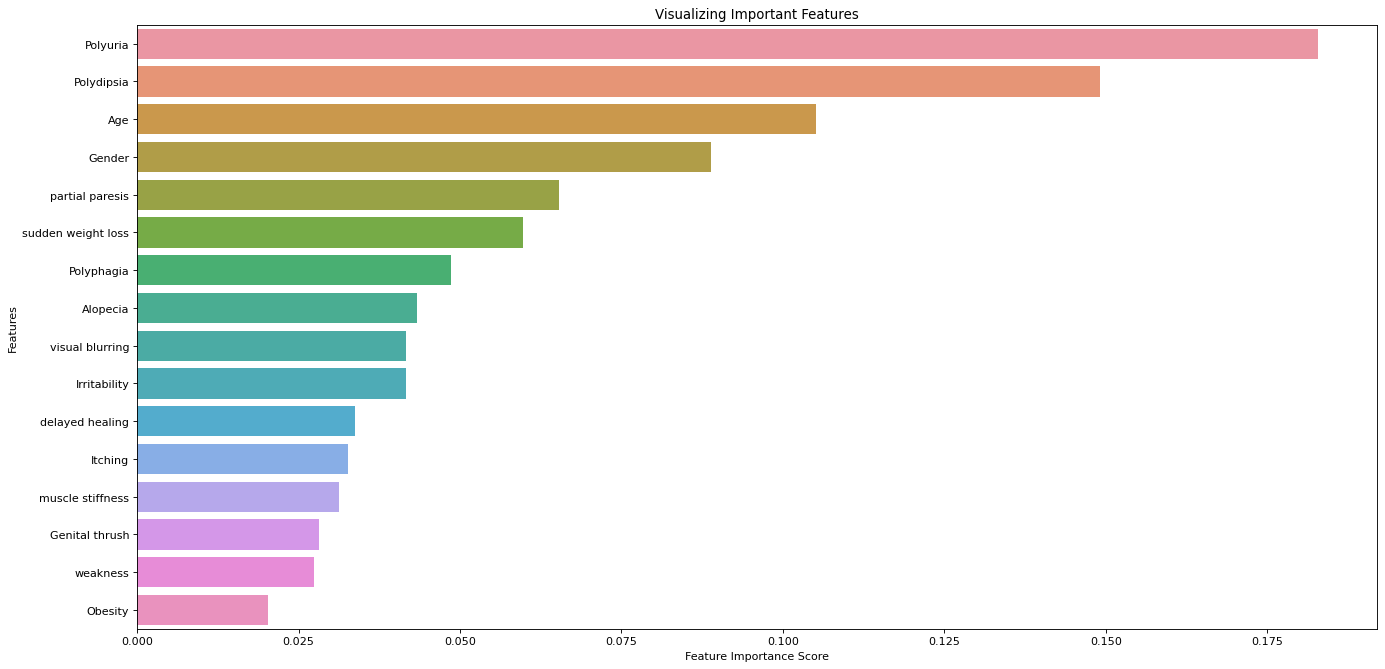

In [18]:
clf = RandomForestClassifier(n_estimators=400, criterion='gini', max_depth=None, min_samples_split=2, 
        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=2, 
        max_leaf_nodes=None, min_impurity_decrease=0.0, 
        bootstrap=True, oob_score=True, n_jobs=None, random_state=13, verbose=0, 
        warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

clf.fit(X,y)

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Analysis:
    
    From the table above, we can see that the most important features in determining if one has Diabetes are Polyuria and Polydipsia. This makes sense, since these are the same features that we observed as having the strongest level of correlation with our response vairable, having Diabetes.

FINAL RESULTS TABLE

In [19]:
print("The Decision Tree Accuracy is 92.30769230769231%\n")
print("The K-Nearest Neighbor Classifier Accuracy is 90.38461538461539%\n")
print("The Random Forest Accuracy is 98.07692307692307% with GridSearch CV\n")
print("The Random Forest Accuracy is 98.07692307692307% with Bayesian Optimization CV\n")

The Decision Tree Accuracy is 92.30769230769231%

The K-Nearest Neighbor Classifier Accuracy is 90.38461538461539%

The Random Forest Accuracy is 98.07692307692307% with GridSearch CV

The Random Forest Accuracy is 98.07692307692307% with Bayesian Optimization CV



FULL PROJECT CONCLUSION:
    
    In conclusion, the most optimal algorithm for classification on this dataset was the Random Forest. While all methods achieved a high level of accuracy, the Random Forest with Cross Validated Bayesian Optimization achieved the best results while not putting in too much computational time. Each method has its own pros and cons, but for this dataset, the winner is clear.